<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [35]:
!pip install pandas

In [36]:
!pip install matplotlib


In [37]:
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [38]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-04 22:05:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  61.8MB/s    in 2.5s    

2025-11-04 22:05:21 (61.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data


In [40]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [41]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



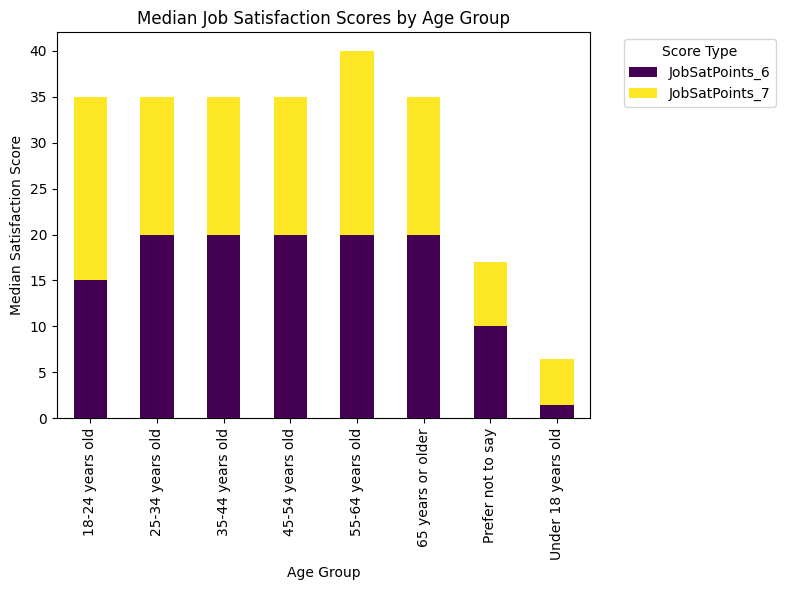

In [42]:
## Write your code here
# Replace 'Prefer not to say' with NaN
import numpy as np 
df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7'], inplace=True)

dffilt = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']] 

median_df = dffilt.groupby('Age', as_index=False).median()
median_df.set_index('Age', inplace=True)

# Plot stacked bar chart
median_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

# Customize plot
plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.legend(title='Score Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the chart
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


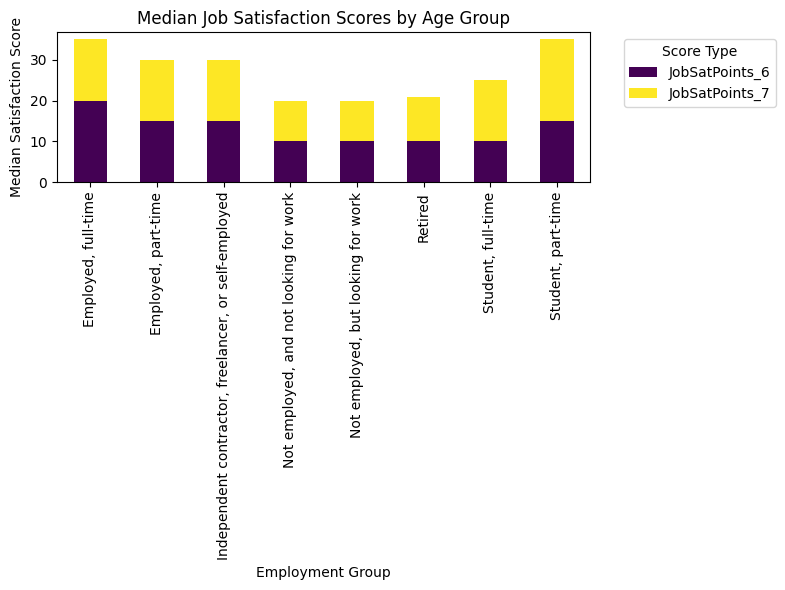

In [43]:
## Write your code here
# Replace 'Prefer not to say' with NaN


df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7'], inplace=True)

dffilt = df[['Employment', 'JobSatPoints_6', 'JobSatPoints_7']].copy()
dffilt['Employment'] = dffilt['Employment'].str.split(';')
dffilt = dffilt.explode('Employment')
dffilt['Employment'] = dffilt['Employment'].str.strip()

median_df = dffilt.groupby('Employment', as_index=False).median()
median_df.set_index('Employment', inplace=True)

# Plot stacked bar chart
median_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

# Customize plot
plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Employment Group')
plt.ylabel('Median Satisfaction Score')
plt.legend(title='Score Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the chart
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


/tmp/ipykernel_695/732994580.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeMapped'].fillna(df['AgeMapped'].mean(), inplace=True)


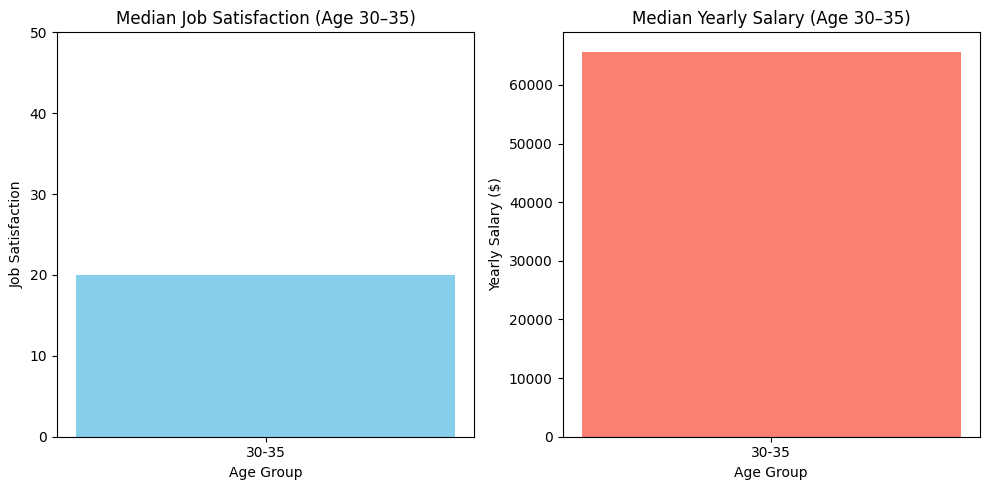

In [44]:
##Write your code here

# Replace 'Prefer not to say' with NaN
import numpy as np 
df.replace('Prefer not to say', np.nan, inplace=True)

# Mapping for Age groups to their midpoints
mapping_age_group = {
    '25-34 years old': 30,
    '35-44 years old': 35
}

# Map the Age column to age groups
df['AgeMapped'] = df['Age'].map(mapping_age_group)

# Replace NaN in AgeMapped with its mean value
df['AgeMapped'].fillna(df['AgeMapped'].mean(), inplace=True)

# Filter the data for age group 30 to 35
df_age_group = df[(df['AgeMapped'] >= 30.0) & (df['AgeMapped'] <= 35.0)]

# Compute medians
median_job_sat = df_age_group['JobSatPoints_6'].median()
median_salary = df_age_group['ConvertedCompYearly'].median()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Chart 1: Median Job Satisfaction ---
axes[0].bar('30-35', median_job_sat, color='skyblue')
axes[0].set_title('Median Job Satisfaction (Age 30–35)')
axes[0].set_ylabel('Job Satisfaction')
axes[0].set_xlabel('Age Group')
axes[0].set_ylim(0, 50)  # Assuming a satisfaction scale of 0–10

# --- Chart 2: Median Yearly Salary ---
axes[1].bar('30-35', median_salary, color='salmon')
axes[1].set_title('Median Yearly Salary (Age 30–35)')
axes[1].set_ylabel('Yearly Salary ($)')
axes[1].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_695/2995051778.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='center')
/tmp/ipykernel_695/2995051778.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='center')


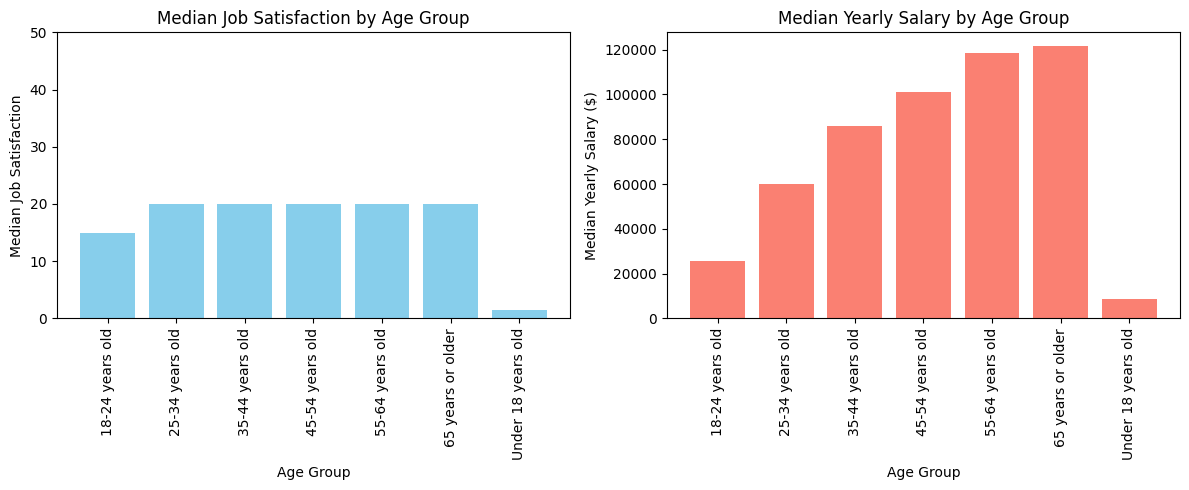

In [45]:
##Write your code here

# Replace 'Prefer not to say' with NaN
import numpy as np 
df.replace('Prefer not to say', np.nan, inplace=True)

dffilt = df[['Age', 'JobSatPoints_6', 'ConvertedCompYearly']].copy()

median_df = dffilt.groupby('Age', as_index=False).median()

# Create subplots for separate charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Chart 1: Median Job Satisfaction ---
axes[0].bar(median_df['Age'], median_df['JobSatPoints_6'], color='skyblue')
axes[0].set_title('Median Job Satisfaction by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Median Job Satisfaction')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='center')
axes[0].set_ylim(0, 50)  # assuming satisfaction scale of 0–10

# --- Chart 2: Median Yearly Salary ---
axes[1].bar(median_df['Age'], median_df['ConvertedCompYearly'], color='salmon')
axes[1].set_title('Median Yearly Salary by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Median Yearly Salary ($)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


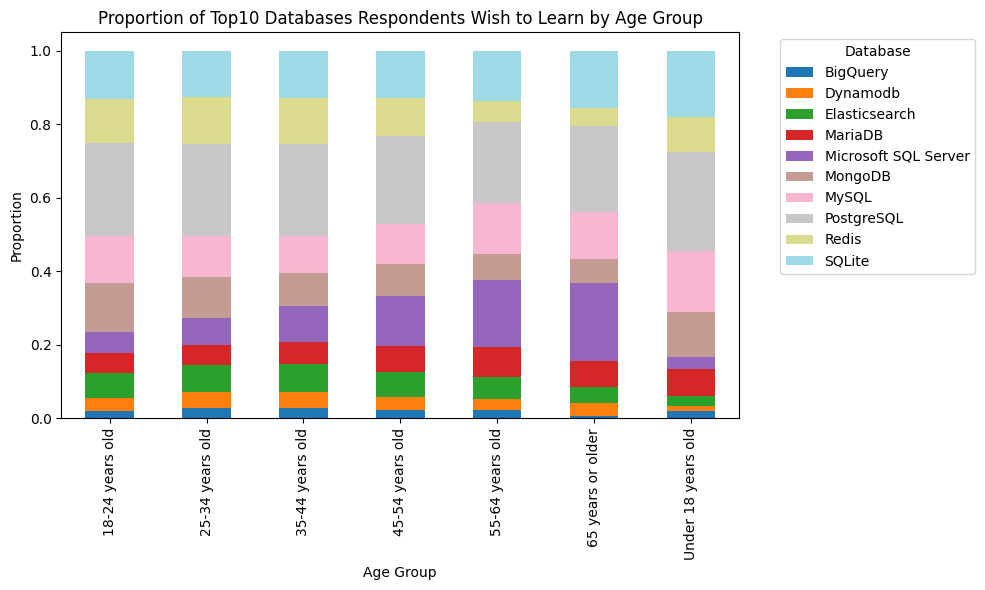

In [47]:
##Write your code here
df.dropna(subset=['DatabaseWantToWorkWith'], inplace=True)

dffilt = df[['Age','DatabaseWantToWorkWith']].copy() 

dffilt['DatabaseWantToWorkWith'] = dffilt['DatabaseWantToWorkWith'].str.split(';')
dffilt = dffilt.explode('DatabaseWantToWorkWith')
dffilt['DatabaseWantToWorkWith'] = dffilt['DatabaseWantToWorkWith'].str.strip()

top_dattype = dffilt['DatabaseWantToWorkWith'].value_counts().head(10).index
dffilt = dffilt[dffilt['DatabaseWantToWorkWith'].isin(top_dattype)]
dffilt

counts = dffilt.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Convert to proportions within each age group
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title("Proportion of Top10 Databases Respondents Wish to Learn by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Database", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [69]:
##Write your code here
df.dropna(subset=['Employment'], inplace=True)

dffilt = df[['Employment','JobSat']].copy() 



dffilt


,Employment,JobSat
1,"Employed, full-time",NaN
10,"Employed, full-time",8.0
12,"Employed, full-time",8.0
15,"Employed, full-time",5.0
18,"Employed, full-time",10.0
...,...,...
65163,"Employed, full-time",9.0
65166,"Employed, full-time",8.0
65167,"Employed, full-time",10.0
65351,"Employed, full-time;Independent contractor, fr...",8.0


In [70]:
dffilt.dropna(inplace=True)


dffilt['Employment'] = dffilt['Employment'].str.split(';')
dffilt = dffilt.explode('Employment')
dffilt['Employment'] = dffilt['Employment'].str.strip()

dffilt = dffilt[['Employment','JobSat']]
dffilt

,Employment,JobSat
10,"Employed, full-time",8.0
12,"Employed, full-time",8.0
15,"Employed, full-time",5.0
18,"Employed, full-time",10.0
20,"Employed, full-time",6.0
...,...,...
65163,"Employed, full-time",9.0
65166,"Employed, full-time",8.0
65167,"Employed, full-time",10.0
65351,"Employed, full-time",8.0


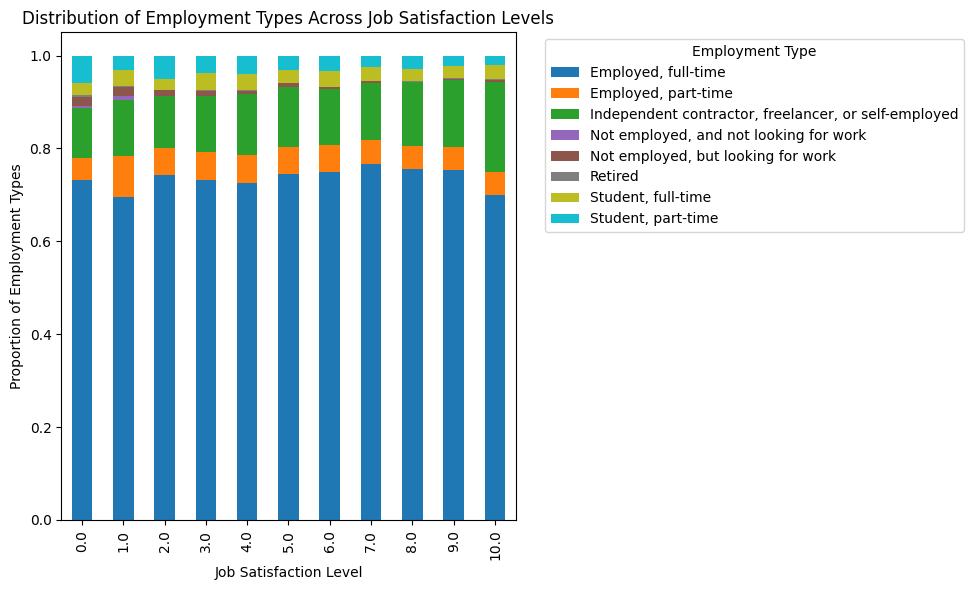

In [71]:
# Group by satisfaction score and employment type
counts = dffilt.groupby(['JobSat', 'Employment']).size().unstack(fill_value=0)

# Convert to proportions within each satisfaction score for each category
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')

plt.title("Distribution of Employment Types Across Job Satisfaction Levels")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Proportion of Employment Types")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


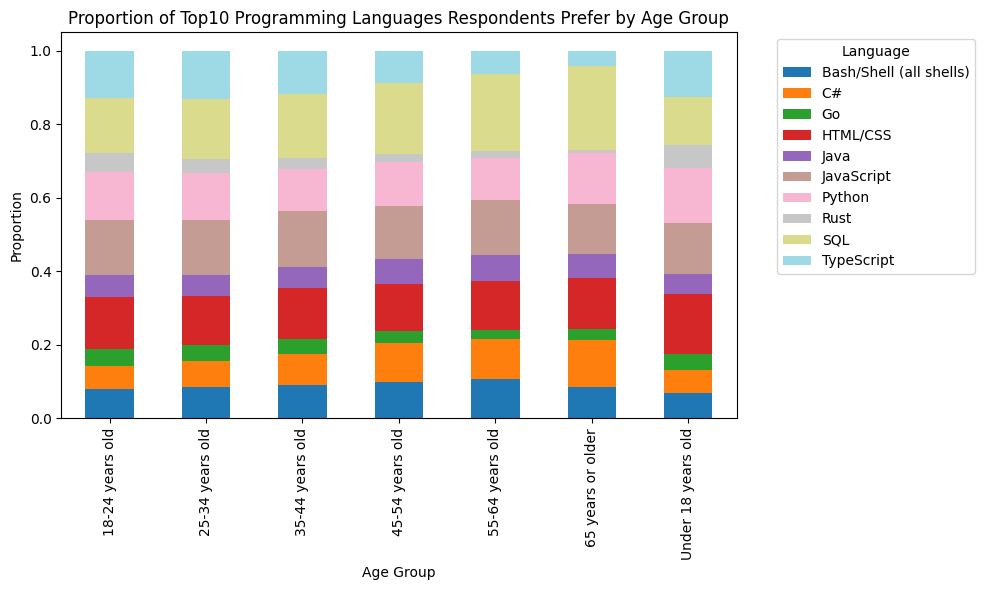

In [75]:
##Write your code here
df.dropna(subset=['LanguageAdmired'], inplace=True)

dffilt = df[['Age','LanguageAdmired']].copy() 

dffilt['LanguageAdmired'] = dffilt['LanguageAdmired'].str.split(';')
dffilt = dffilt.explode('LanguageAdmired')
dffilt['LanguageAdmired'] = dffilt['LanguageAdmired'].str.strip()

top_dattype = dffilt['LanguageAdmired'].value_counts().head(10).index
dffilt = dffilt[dffilt['LanguageAdmired'].isin(top_dattype)]
dffilt

counts = dffilt.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Convert to proportions within each age group
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title("Proportion of Top10 Programming Languages Respondents Prefer by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


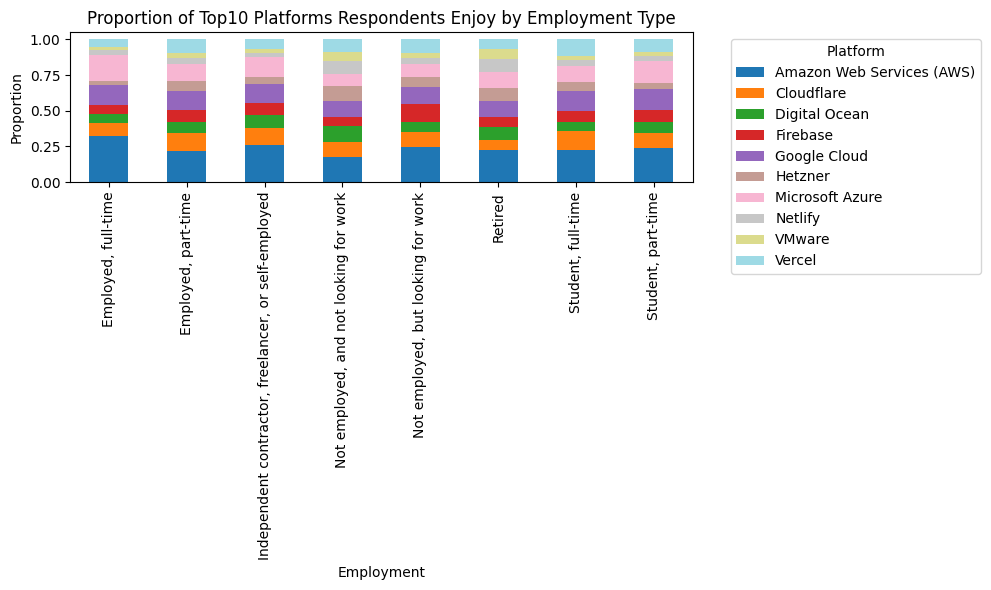

In [81]:
##Write your code here
df.dropna(subset=['PlatformAdmired'], inplace=True)

dffilt = df[['Employment','PlatformAdmired']].copy() 

dffilt['Employment'] = dffilt['Employment'].str.split(';')
dffilt = dffilt.explode('Employment')
dffilt['Employment'] = dffilt['Employment'].str.strip()

dffilt['PlatformAdmired'] = dffilt['PlatformAdmired'].str.split(';')
dffilt = dffilt.explode('PlatformAdmired')
dffilt['PlatformAdmired'] = dffilt['PlatformAdmired'].str.strip()

top_dattype = dffilt['PlatformAdmired'].value_counts().head(10).index
dffilt = dffilt[dffilt['PlatformAdmired'].isin(top_dattype)]
dffilt

counts = dffilt.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Convert to proportions within each age group
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title("Proportion of Top10 Platforms Respondents Enjoy by Employment Type")
plt.xlabel("Employment")
plt.ylabel("Proportion")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
